In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


#Step 0
Just to generate DocTR data, skip if we already have

In [ ]:
!pip install python-doctr[torch]
exit(0)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 239 kB 23.8 MB/s 
     |████████████████████████████████| 604 kB 60.0 MB/s 
     |████████████████████████████████| 262 kB 65.4 MB/s 
     |████████████████████████████████| 2.8 MB 56.0 MB/s 
     |████████████████████████████████| 3.2 MB 58.7 MB/s 
     |████████████████████████████████| 235 kB 66.1 MB/s 
     |████████████████████████████████| 2.2 MB 49.9 MB/s 
     |████████████████████████████████| 981 kB 45.7 MB/s 
     |████████████████████████████████| 89 kB 8.6 MB/s 
     |████████████████████████████████| 163 kB 63.2 MB/s 
     |████████████████████████████████| 965 kB 63.3 MB/s 
     |████████████████████████████████| 112 kB 64.4 MB/s 
     |████████████████████████████████| 2.0 MB 48.0 MB/s 
     |████████████████████████████████| 357 kB 68.9 MB/s 
     |████████████████████████████████| 705 kB 63.7 MB/s 
  Created wheel for langdetect: f

In [ ]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 24.0 MB/s 


In [ ]:
import os

# Let's pick the desired backend
# os.environ['USE_TF'] = '1'
os.environ['USE_TORCH'] = '1'

import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor

In [ ]:
predictor = ocr_predictor(pretrained=True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


  0%|          | 0/101971449 [00:00<?, ?it/s]

  0%|          | 0/63286381 [00:00<?, ?it/s]

In [ ]:
!pip3 install reportlab>=3.6.2
# optional if you want to merge multiple pdfs
!pip3 install PyPDF2==1.26.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 6.4 MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61102 sha256=027647d2bc99854e1c7464505d650d4ca2f2f782bdaef3e6e06942d3b0a1dfcb
  Stored in directory: /root/.cache/pip/wheels/80/1a/24/648467ade3a77ed20f35cfd2badd32134e96dd25ca811e64b3
Successfully built PyPDF2


In [ ]:
import os
len(os.listdir("/content/drive/MyDrive/BTP/100Docbank"))

100

In [ ]:
DIR = "/content/drive/MyDrive/BTP/100Docbank"
files = sorted([os.path.join(DIR,f) for f in os.listdir(DIR)])

In [ ]:
import torch
if torch.cuda.is_available():
        predictor = predictor.cuda()

In [ ]:
!mkdir /content/drive/MyDrive/BTP/100DocbankDoctrIms
!mkdir /content/drive/MyDrive/BTP/100DocbankDoctrAnns

In [ ]:
import numpy as np
from doctr.io import DocumentFile
from doctr.models import ocr_predictor
from PIL import Image
from reportlab.lib.colors import black
from reportlab.lib.units import inch
from reportlab.lib.utils import ImageReader
from reportlab.pdfgen.canvas import Canvas
from doctr.utils.visualization import visualize_page
import json

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

length = len(files)

for i in range(length):
    # if (i+1)*10>length:
    ims = DocumentFile.from_images([files[i]])
    # else: 
        # ims = DocumentFile.from_images(files[i*10:(i+1)*10])

    # if torch.cuda.is_available():
    #     ims = ims.cuda()
    result = predictor(ims)
    json_result = result.export()

    # for j in range(len(ims)):
    json_result['pages'][0]["file_name"]=os.path.basename(files[i])
    fig=visualize_page(json_result['pages'][0], ims[0]) 
    fig.set_figheight(json_result['pages'][0]["dimensions"][0]/96)
    fig.set_figwidth(json_result['pages'][0]["dimensions"][1]/96)
    fig.savefig(os.path.join("/content/drive/MyDrive/BTP/100DocbankDoctrIms", f'{os.path.basename(files[i]).replace("_ori.jpg","")}.jpg'))
    plt.close(fig)
        # break

    with open(os.path.join("/content/drive/MyDrive/BTP/100DocbankDoctrAnns",f'{os.path.basename(files[i]).replace("_ori.jpg","")}.json'), "w") as outfile:
        json.dump(json_result, outfile)
    print(i)
    # print(json_result)
    # print()
    # img = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
    # img  = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    # # img is rgb, convert to opencv's default bgr
    # img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    # cv2_imshow(img)
    # break

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


#Step 1
Paragraph --> get the word box --> get the statistics inside each --> one line box get x_next-x_cur --> for every line box, take the first word box and get the y_next-y_cur

In [ ]:
IMG_DIR = "/content/drive/MyDrive/BTP/100Docbank"
JSON_ANNS = "/content/drive/MyDrive/BTP/100DocBank_annotations.json"

In [ ]:
import json
import os
import numpy as np

In [ ]:
len(os.listdir(IMG_DIR))

100

In [ ]:
f = open(JSON_ANNS)
data = json.load(f)

In [ ]:
data.keys()

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

In [ ]:
id_to_tag = {i["id"]:i["name"] for i in data["categories"]}
id_to_tag

{0: 'Abstract',
 1: 'Author',
 2: 'Caption',
 3: 'Equation',
 4: 'Figure',
 5: 'Footer',
 6: 'List',
 7: 'Paragraph',
 8: 'Reference',
 9: 'Section',
 10: 'Table',
 11: 'Title',
 12: 'Date'}

In [ ]:
image_id_to_para_bbox = {i["id"]:[] for i in data["images"]}

for ann in data["annotations"]:
    if id_to_tag[ann["category_id"]]=="Paragraph":
        # print("here")
        image_id_to_para_bbox[ann["image_id"]].append([ann["bbox"][0],ann["bbox"][1],
                                                       ann["bbox"][0]+ann["bbox"][2],ann["bbox"][1]+ann["bbox"][3]])

In [ ]:
image_id_to_para_bbox[1]

[[196, 210, 674, 243],
 [1242, 2212, 1511, 2233],
 [115, 210, 148, 243],
 [115, 1319, 234, 1342],
 [276, 2037, 396, 2058]]

Small verification

In [ ]:
from PIL import Image, ImageDraw, ImageFont
from google.colab.patches import cv2_imshow

In [ ]:
files = sorted([os.path.join(IMG_DIR,i) for i in os.listdir(IMG_DIR)])
id = 0
imgp = files[id]
image = Image.open(imgp)
image = image.convert("RGB")
draw = ImageDraw.Draw(image, "RGBA")
font = ImageFont.load_default()

for ann in image_id_to_para_bbox[id]:
    # label = ann[-1]
    box = (int(ann[0]),int(ann[1]),int(ann[2]),int(ann[3]))
    # print(box)
    # general_box = annotation['box']
    # draw.rectangle(general_box, outline=label2color[label], width=2)
    # draw.text((general_box[0] + 10, general_box[1] - 10), label, fill=label2color[label], font=font)
    # words = annotation['words']
    # for word in words:
    #     box = word['box']
    draw.rectangle(box, outline="red", width=1)
    # draw.text((ann[0] + 10, ann[1] - 10), id_to_class[label], fill=label2color[label], font=font)
open_cv_image = np.array(image) 
# Convert RGB to BGR 
open_cv_image = open_cv_image[:, :, ::-1].copy() 
cv2_imshow(open_cv_image)

Output hidden; open in https://colab.research.google.com to view.

To make a line box in a paragraph, check if it lies between some paragraph box


*   Sort the para word boxes wrt lowest y's and then lowest x's
*   For each line box, check if some para box has lower y1 and larger y2
*   Essentially take the lower_bound method and check on the y2. Then check y1 and y2 of that para box with that of the line box.



In [ ]:
image_id_to_para_bbox = {k:sorted(v, key=lambda x: (x[1], x[0])) for k,v in image_id_to_para_bbox.items()}

In [ ]:
image_id_to_para_bbox[2]

[[802, 140, 895, 167],
 [136, 620, 833, 928],
 [1164, 627, 1264, 653],
 [136, 1080, 833, 1346],
 [867, 1207, 926, 1234],
 [865, 1335, 1562, 1667],
 [136, 1388, 833, 1654],
 [136, 1696, 833, 1995],
 [880, 1962, 940, 1988]]

In [ ]:
DOCTR_ANNS_DIR = "/content/drive/MyDrive/BTP/100DocbankDoctrAnns"
ann_files = sorted([os.path.join(DOCTR_ANNS_DIR,i) for i in os.listdir(DOCTR_ANNS_DIR)])
len(ann_files)

100

In [ ]:
image_id_to_para_line = {i:[] for i in image_id_to_para_bbox}
len(image_id_to_para_line)

100

In [ ]:
##IoU function
## credits: https://gist.github.com/meyerjo/dd3533edc97c81258898f60d8978eddc

def bb_intersection(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # compute the area of intersection rectangle
    interArea = abs(max((xB - xA, 0)) * max((yB - yA), 0))
    return interArea
    # if interArea == 0:
    #     return 0
    # # compute the area of both the prediction and ground-truth
    # # rectangles
    # boxAArea = abs((boxA[2] - boxA[0]) * (boxA[3] - boxA[1]))
    # boxBArea = abs((boxB[2] - boxB[0]) * (boxB[3] - boxB[1]))

    # # compute the intersection over union by taking the intersection
    # # area and dividing it by the sum of prediction + ground-truth
    # # areas - the interesection area
    # iou = interArea / float(boxAArea + boxBArea - interArea)

    # # return the intersection over union value
    # return iou  

In [ ]:
import json
import bisect

for i,p in enumerate(ann_files):
    para_boxes = image_id_to_para_bbox[i]
    with open(p) as f:
        data=json.load(f)
        page = data["pages"][0]
        h,w = page["dimensions"]
        image_id_to_para_line[i].append((h,w))
        for block in page["blocks"]:
            for line in block["lines"]:
                line_bbox = line["geometry"]
                line_bbox = [line_bbox[0][0]*w, line_bbox[0][1]*h, line_bbox[1][0]*w, line_bbox[1][1]*h]
                for box in para_boxes:
                    if bb_intersection(line_bbox,box)>0:
                        image_id_to_para_line[i].append(line)
                        break
    # break

In [ ]:
image_id_to_para_line[19]

[(2200, 1700),
 {'geometry': [[0.2177734375, 0.1572265625], [0.78125, 0.1767578125]],
  'words': [{'value': 'Proof',
    'confidence': 0.9999946355819702,
    'geometry': [[0.2177734375, 0.16015625], [0.267578125, 0.171875]]},
   {'value': 'The',
    'confidence': 0.9999918937683105,
    'geometry': [[0.2705078125, 0.1591796875], [0.3037109375, 0.173828125]]},
   {'value': 'identity',
    'confidence': 0.9972612857818604,
    'geometry': [[0.3037109375, 0.16015625], [0.3623046875, 0.1748046875]]},
   {'value': '(2.15),',
    'confidence': 0.9518029689788818,
    'geometry': [[0.365234375, 0.158203125], [0.4091796875, 0.1767578125]]},
   {'value': 'for',
    'confidence': 0.9783740043640137,
    'geometry': [[0.4140625, 0.158203125], [0.4404296875, 0.173828125]]},
   {'value': 'd',
    'confidence': 0.9942176342010498,
    'geometry': [[0.439453125, 0.1591796875], [0.455078125, 0.173828125]]},
   {'value': '=T=',
    'confidence': 0.946993887424469,
    'geometry': [[0.44921875, 0.15820

Save the line box images once

In [ ]:
!mkdir /content/drive/MyDrive/BTP/100Docbankline
!mkdir /content/drive/MyDrive/BTP/100Docbankline/normal

mkdir: cannot create directory ‘/content/drive/MyDrive/BTP/100Docbankline’: File exists


In [ ]:
RES_DIR = "/content/drive/MyDrive/BTP/100Docbankline"

In [ ]:
import cv2

files = sorted([os.path.join(IMG_DIR,i) for i in os.listdir(IMG_DIR)])
# np.random.seed(69)
# ids = np.random.randint(0,len(files),10)
for id in range(len(files)):
    imgp = files[id]
    image = Image.open(imgp)
    image = image.convert("RGB")
    draw = ImageDraw.Draw(image, "RGBA")
    font = ImageFont.load_default()
    h,w = image_id_to_para_line[id][0]

    for ann in image_id_to_para_line[id][1:]:
        # label = ann[-1]
        ann_t=ann["geometry"]
        box = (int(ann_t[0][0]*w),int(ann_t[0][1]*h),int(ann_t[1][0]*w),int(ann_t[1][1]*h))
        # print(box)
        # general_box = annotation['box']
        # draw.rectangle(general_box, outline=label2color[label], width=2)
        # draw.text((general_box[0] + 10, general_box[1] - 10), label, fill=label2color[label], font=font)
        # words = annotation['words']
        # for word in words:
        #     box = word['box']
        draw.rectangle(box, outline="blue", width=1)
        # draw.text((ann[0] + 10, ann[1] - 10), id_to_class[label], fill=label2color[label], font=font)
    open_cv_image = np.array(image) 
    # Convert RGB to BGR 
    open_cv_image = open_cv_image[:, :, ::-1].copy() 
    cv2.imwrite(os.path.join(RES_DIR,"normal",os.path.basename(files[id])), open_cv_image)
    # cv2_imshow(open_cv_image)

Trend of x_next-x_prev of word boxes

In [ ]:
xdiff_data = []
for k,v in image_id_to_para_line.items():
    h,w = v[0]

    for line in v[1:]:
        word_bboxes=[]
        for word in line["words"]:
            word_bbox = word["geometry"]
            word_bbox = [word_bbox[0][0]*w, word_bbox[0][1]*h, word_bbox[1][0]*w, word_bbox[1][1]*h]
            word_bboxes.append(word_bbox)
        word_bboxes=sorted(word_bboxes)
        for i in range(1,len(word_bboxes)):
            xdiff_data.append(word_bboxes[i][0]-word_bboxes[i-1][0])

    # break

In [ ]:
# np.quantile(xdiff_data,np.arange(0,1.1,0.25))
len(xdiff_data)

34725

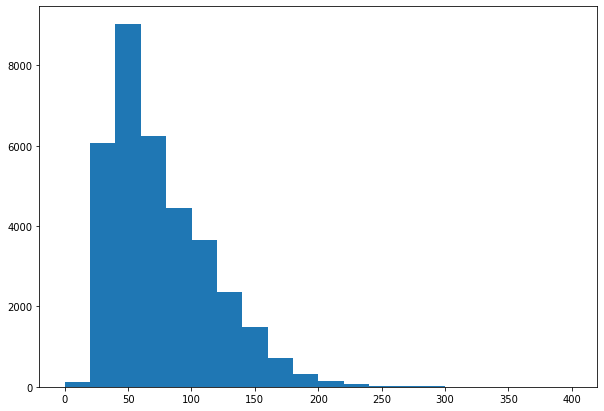

In [ ]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(xdiff_data, bins=20)
 
# Show plot
plt.show()

In [ ]:
np.quantile(xdiff_data,np.arange(0,1.1,0.1))

array([  0.        ,  33.203125  ,  41.99609375,  49.8046875 ,
        58.10546875,  66.40625   ,  78.02734375,  92.06835938,
       109.8359375 , 132.8125    , 400.09765625])

## Improve line boxes
Based on this data, if I limit to the 70 percentile-80 percentile (92.06-109.83, take avg to be 100), can I do make line box prediction better?

**Ideas**


*   For each word box, look at its right word box
*   If the gap is greater than this threshold, divide the line box then and there.
*   If we reach end, we can rejoin the line box and get the final set of line boxes.



## Analysis


1.   100--> a tad bit too small, does well on 2 column but the grouping is wierd at times. ALso sometimes intercolumn bleeding seen.
2.   List item



In [ ]:
X_THRESHOLDS=[60,70,80,90,100,110,120,130,140,150,160]

In [ ]:
for X_THRESHOLD in X_THRESHOLDS:
    image_id_to_new_para_line = {k:[] for k in image_id_to_para_line}
    for k,v in image_id_to_para_line.items():
        h,w = v[0]

        for line in v[1:]:
            word_bboxes=[]
            for word in line["words"]:
                word_bbox = word["geometry"]
                word_bbox = [word_bbox[0][0]*w, word_bbox[0][1]*h, word_bbox[1][0]*w, word_bbox[1][1]*h]
                word_bboxes.append(word_bbox)
            word_bboxes=sorted(word_bboxes)
            cur_left_x=-1
            cur_left_y=-1
            cur_right_x=-1
            cur_right_y=-1

            for i in range(1,len(word_bboxes)):
                if cur_left_x<0 and cur_left_y<0:
                    cur_left_x=word_bboxes[i-1][0]
                    cur_left_y=word_bboxes[i-1][1]

                cur_right_x=word_bboxes[i][2]
                cur_right_y=word_bboxes[i][3]

                if word_bboxes[i][0]-word_bboxes[i-1][0]>X_THRESHOLD:
                    image_id_to_new_para_line[k].append([cur_left_x, cur_left_y, word_bboxes[i-1][2], word_bboxes[i-1][3]])
                    cur_left_x=word_bboxes[i][0]
                    cur_left_y=word_bboxes[i][1]
                
            image_id_to_new_para_line[k].append([cur_left_x, cur_left_y, cur_right_x, cur_right_y])
        
    DIR_T=os.path.join(RES_DIR,str(X_THRESHOLD))
    if not os.path.exists(DIR_T):
        os.makedirs(DIR_T)
    for id in range(len(files)):
        imgp = files[id]
        image = Image.open(imgp)
        image = image.convert("RGB")
        draw = ImageDraw.Draw(image, "RGBA")
        font = ImageFont.load_default()
        h,w = image_id_to_para_line[id][0]

        for ann in image_id_to_new_para_line[id]:
            # label = ann[-1]
            box = (int(ann[0]),int(ann[1]),int(ann[2]),int(ann[3]))
            # print(box)
            # general_box = annotation['box']
            # draw.rectangle(general_box, outline=label2color[label], width=2)
            # draw.text((general_box[0] + 10, general_box[1] - 10), label, fill=label2color[label], font=font)
            # words = annotation['words']
            # for word in words:
            #     box = word['box']
            draw.rectangle(box, outline="blue", width=1)
            # draw.text((ann[0] + 10, ann[1] - 10), id_to_class[label], fill=label2color[label], font=font)
        open_cv_image = np.array(image) 
        # Convert RGB to BGR 
        open_cv_image = open_cv_image[:, :, ::-1].copy() 
        cv2.imwrite(os.path.join(DIR_T,os.path.basename(files[id])), open_cv_image)
        # cv2_imshow(open_cv_image)
    print(X_THRESHOLD)

60
70
80
90
100
110
120
130
140
150
160


###Another approach:
Seems like a threshold of 60-80 is good, but then the line boxes become too fragmented. We can look at the previous right x and maybe not break immediately.

In [ ]:
xdiff2_data = []
for k,v in image_id_to_para_line.items():
    h,w = v[0]

    for line in v[1:]:
        word_bboxes=[]
        for word in line["words"]:
            word_bbox = word["geometry"]
            word_bbox = [word_bbox[0][0]*w, word_bbox[0][1]*h, word_bbox[1][0]*w, word_bbox[1][1]*h]
            word_bboxes.append(word_bbox)
        word_bboxes=sorted(word_bboxes)
        for i in range(1,len(word_bboxes)):
            xdiff2_data.append(word_bboxes[i][0]-word_bboxes[i-1][2])

    # break

In [ ]:
np.quantile(xdiff2_data,np.arange(0,1.1,0.1))
# len(xdiff2_data)

array([-119.53125   ,   -1.61523438,    0.        ,    1.61523438,
          1.66015625,    3.23046875,    3.3203125 ,    4.84570312,
          4.98046875,    6.640625  ,   58.10546875])

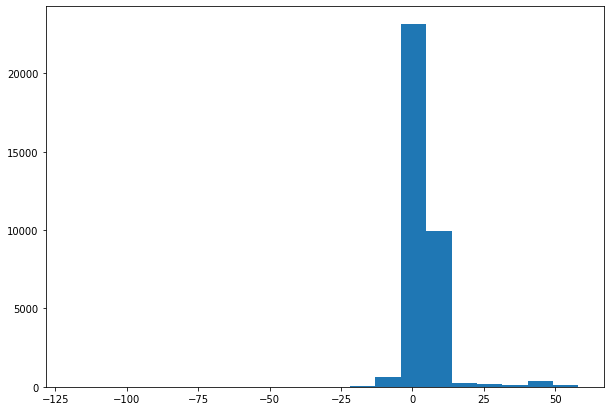

In [ ]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(xdiff2_data, bins=20)
 
# Show plot
plt.show()

Lets keep that threshold is 5

In [ ]:
X_THRESHOLDS2=[1,2,3,4,5,6,7,8]
X_THRESHOLD=60

In [ ]:
for X_THRESHOLD2 in X_THRESHOLDS2:
    image_id_to_new_para_line = {k:[] for k in image_id_to_para_line}
    for k,v in image_id_to_para_line.items():
        h,w = v[0]

        for line in v[1:]:
            word_bboxes=[]
            for word in line["words"]:
                word_bbox = word["geometry"]
                word_bbox = [word_bbox[0][0]*w, word_bbox[0][1]*h, word_bbox[1][0]*w, word_bbox[1][1]*h]
                word_bboxes.append(word_bbox)
            word_bboxes=sorted(word_bboxes)
            cur_left_x=-1
            cur_left_y=-1
            cur_right_x=-1
            cur_right_y=-1

            for i in range(1,len(word_bboxes)):
                if cur_left_x<0 and cur_left_y<0:
                    cur_left_x=word_bboxes[i-1][0]
                    cur_left_y=word_bboxes[i-1][1]

                cur_right_x=word_bboxes[i][2]
                cur_right_y=word_bboxes[i][3]

                if word_bboxes[i][0]-word_bboxes[i-1][0]>X_THRESHOLD and word_bboxes[i][0]-word_bboxes[i-1][2]>X_THRESHOLD2:
                    image_id_to_new_para_line[k].append([cur_left_x, cur_left_y, word_bboxes[i-1][2], word_bboxes[i-1][3]])
                    cur_left_x=word_bboxes[i][0]
                    cur_left_y=word_bboxes[i][1]
                
            image_id_to_new_para_line[k].append([cur_left_x, cur_left_y, cur_right_x, cur_right_y])
        
    DIR_T=os.path.join(RES_DIR,str((X_THRESHOLD,X_THRESHOLD2)))
    if not os.path.exists(DIR_T):
        os.makedirs(DIR_T)
    for id in range(len(files)):
        imgp = files[id]
        image = Image.open(imgp)
        image = image.convert("RGB")
        draw = ImageDraw.Draw(image, "RGBA")
        font = ImageFont.load_default()
        h,w = image_id_to_para_line[id][0]

        for ann in image_id_to_new_para_line[id]:
            # label = ann[-1]
            box = (int(ann[0]),int(ann[1]),int(ann[2]),int(ann[3]))
            # print(box)
            # general_box = annotation['box']
            # draw.rectangle(general_box, outline=label2color[label], width=2)
            # draw.text((general_box[0] + 10, general_box[1] - 10), label, fill=label2color[label], font=font)
            # words = annotation['words']
            # for word in words:
            #     box = word['box']
            draw.rectangle(box, outline="blue", width=1)
            # draw.text((ann[0] + 10, ann[1] - 10), id_to_class[label], fill=label2color[label], font=font)
        open_cv_image = np.array(image) 
        # Convert RGB to BGR 
        open_cv_image = open_cv_image[:, :, ::-1].copy() 
        cv2.imwrite(os.path.join(DIR_T,os.path.basename(files[id])), open_cv_image)
        # cv2_imshow(open_cv_image)
    print(X_THRESHOLD2)
    # break

1
2
3
4
5
6
7
8


In [ ]:
files = sorted([os.path.join(IMG_DIR,i) for i in os.listdir(IMG_DIR)])
np.random.seed(69)
ids = np.random.randint(0,len(files),10)
for id in ids:
    imgp = files[id]
    image = Image.open(imgp)
    image = image.convert("RGB")
    draw = ImageDraw.Draw(image, "RGBA")
    font = ImageFont.load_default()

    for ann in image_id_to_new_para_line[id]:
        # label = ann[-1]
        box = (int(ann[0]),int(ann[1]),int(ann[2]),int(ann[3]))
        # print(box)
        # general_box = annotation['box']
        # draw.rectangle(general_box, outline=label2color[label], width=2)
        # draw.text((general_box[0] + 10, general_box[1] - 10), label, fill=label2color[label], font=font)
        # words = annotation['words']
        # for word in words:
        #     box = word['box']
        draw.rectangle(box, outline="blue", width=1)
        # draw.text((ann[0] + 10, ann[1] - 10), id_to_class[label], fill=label2color[label], font=font)
    open_cv_image = np.array(image) 
    # Convert RGB to BGR 
    open_cv_image = open_cv_image[:, :, ::-1].copy() 
    cv2_imshow(open_cv_image)
    # cv2.imwrite()